In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [14]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(25)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 
                        'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 
                        'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']]
X = selected_features

# Create a Train Test Split

Use `koi_disposition` for the y values

In [15]:
y = df["koi_disposition"]
target_names = ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']
print(X.shape, y.shape)

(6991, 20) (6991,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,1,5855,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,1,6328,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,1,4768,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [18]:
# Scale your data  
# Trying the Standard Scaler this time .... for better or for worse
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [19]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.780
k: 3, Train/Test Score: 0.891/0.785
k: 5, Train/Test Score: 0.867/0.797
k: 7, Train/Test Score: 0.855/0.800
k: 9, Train/Test Score: 0.851/0.799
k: 11, Train/Test Score: 0.843/0.803
k: 13, Train/Test Score: 0.841/0.797
k: 15, Train/Test Score: 0.836/0.801
k: 17, Train/Test Score: 0.830/0.808
k: 19, Train/Test Score: 0.830/0.807


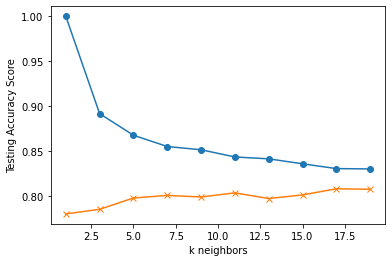

In [21]:
# Loop through different k values to see which has the highest accuracy

train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker='x')
plt.xlabel('k neighbors')
plt.ylabel('Testing Accuracy Score')
plt.show()

In [22]:
# Note... k = 9 gives the best accuracy as the classifier starts to stabilize

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Accuracy: 0.799


In [ ]:
# reference: 2-05-Ins_KNN ... 

# Train the Model



In [23]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8512302117108526
Testing Data Score: 0.7986270022883295


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [24]:
# Create the GridSearchCV model
from sklearn.svm import SVC
model = SVC(kernel='linear')
model



SVC(kernel='linear')

In [25]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
             'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions, target_names=[]))

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)